Optimal indices: [2, 3]
CNOTs counts: [68, 40, 28, 28, 44]


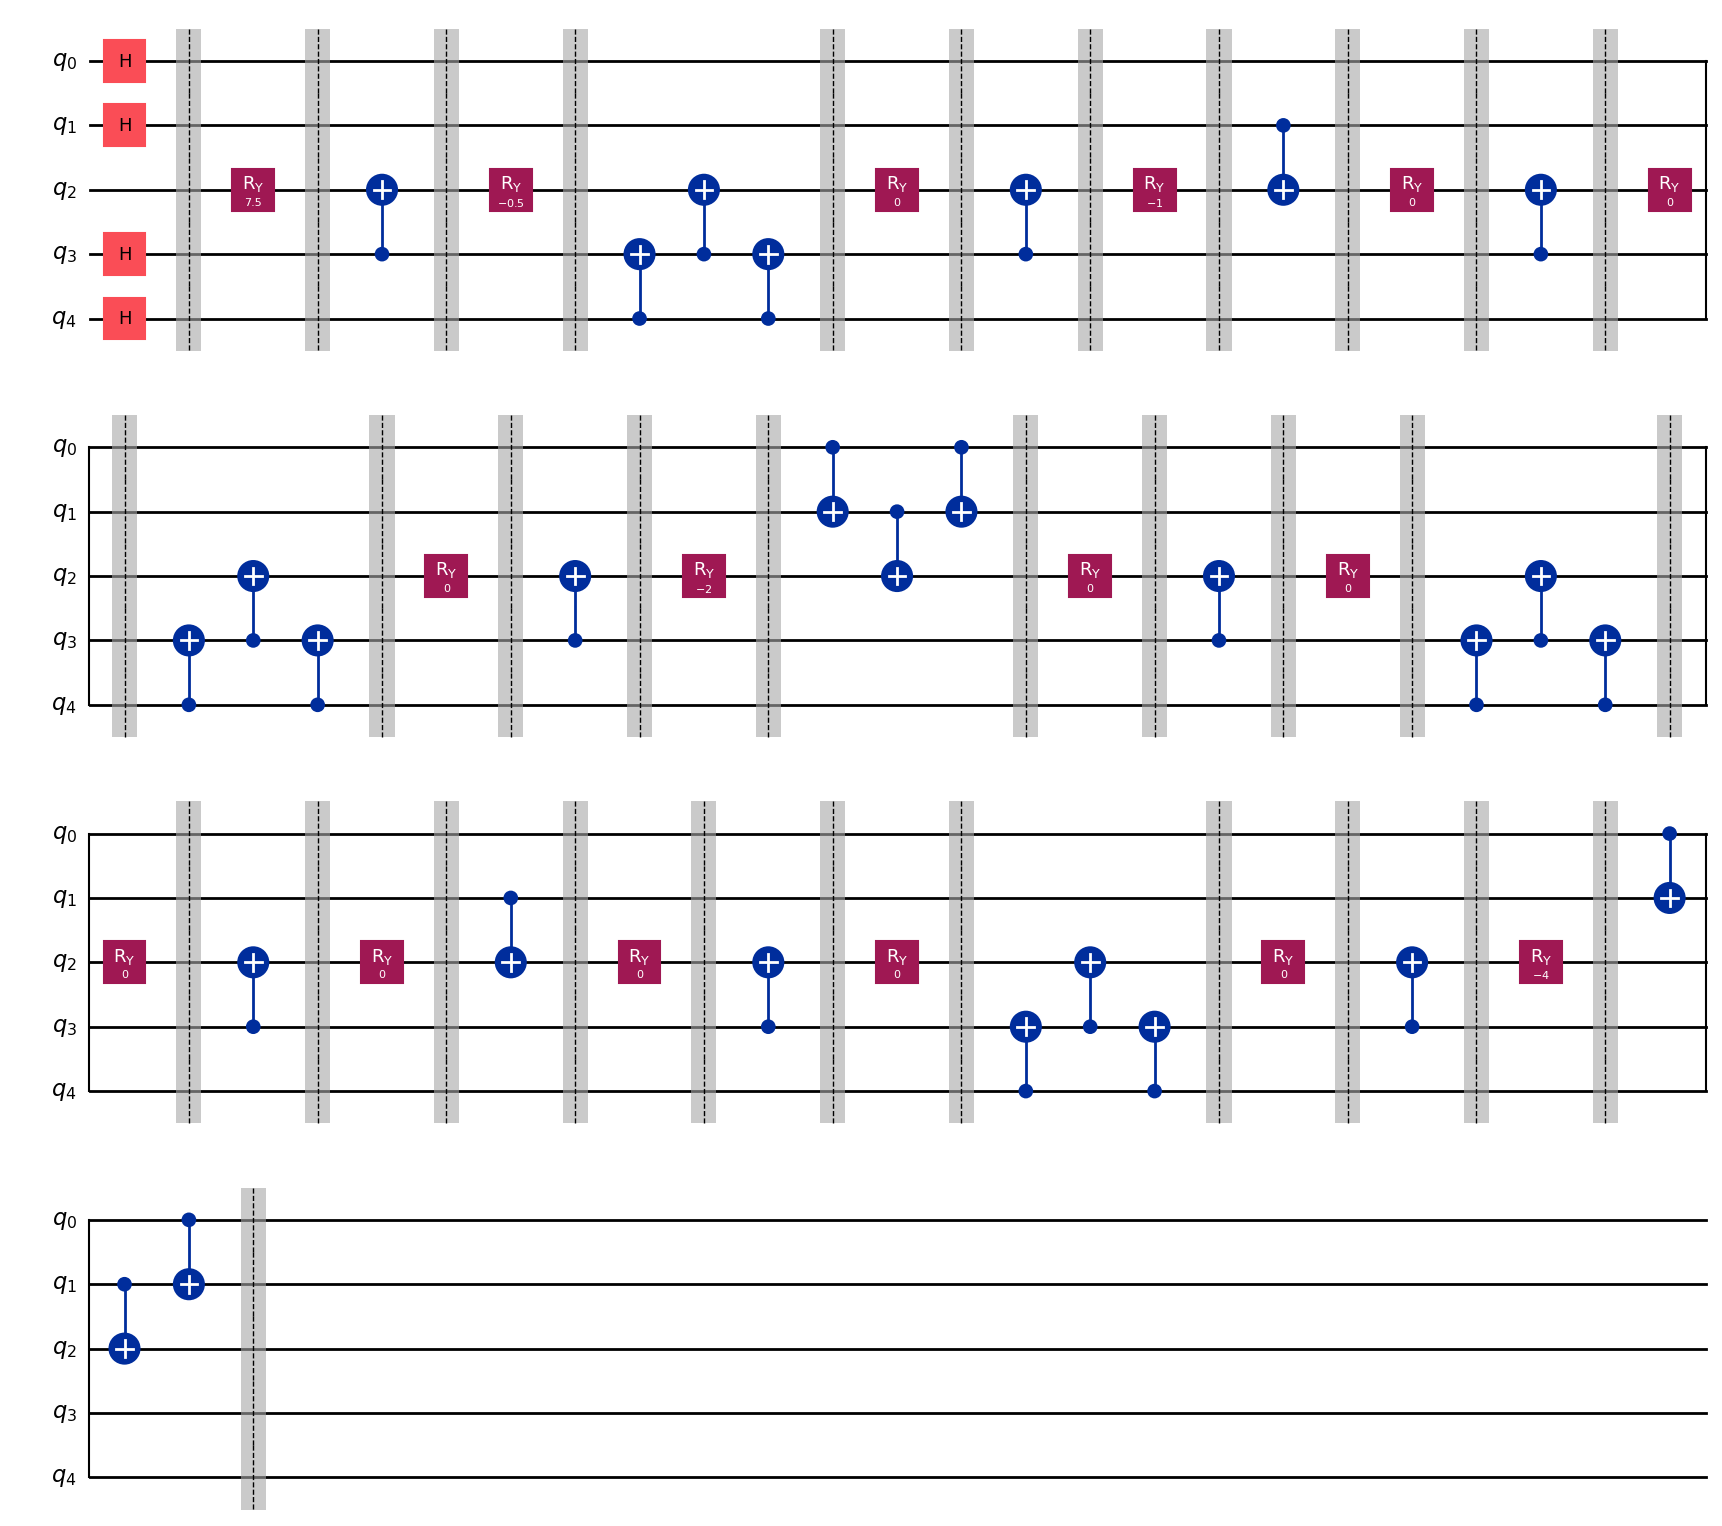

In [4]:
from src.quantum_circuit.quantum_hashing_circuit.circuit import get_quantum_hashing_circuit
from src.quantum_circuit.ucr_circuit_optimizer.graph import floyd_warshall, get_matrix_from_edges, get_shortest_paths
from src.quantum_circuit.ucr_circuit_optimizer.optimizer import calculate_cnots_counts
from src.quantum_computer.architectures import *


num_qubits = FALCON_R4T_NUM_QUBITS
edges = FALCON_R4T_EDGES

adj_matrix = get_matrix_from_edges(num_qubits, edges)
dist_matrix, aux_path_matrix = floyd_warshall(adj_matrix)
optimal_indices, cnots_counts = calculate_cnots_counts(num_qubits, dist_matrix)
print(f"Optimal indices: {optimal_indices}")
print(f"CNOTs counts: {cnots_counts}")

target = optimal_indices[0]
params = [i for i in range(2 ** (num_qubits - 1))]
path_matrix = get_shortest_paths(aux_path_matrix)
is_amplitude_form = True
qc = get_quantum_hashing_circuit(target, num_qubits, params, is_amplitude_form, path_matrix)

qc.draw("mpl")